Credits
---
Code source: Gaël Varoquaux
             Andreas Müller
             
Modified by Chris Holdgraf

License: BSD 3 clause

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# Principles of machine learning
While there are many packages for performing machine learning across a range of languages, the same principles always apply. This will be a short introduction to some of these principles using an example that is on the scikit-learn tutorials section.

Machine learning essentially has four main components to it:

1. Feature extraction
2. Model fitting
3. Model validation
4. Model inspection

In python, it is easy to perform all of these steps (to some degree of satisfaction) with scikit-learn. Let's take a look at all of these steps in the context of an actual dataset.

# Feature extraction
For this step we'll use data from a canonical dataset, the "iris classification" dataset. In a nutshell, this consists of information collected about three different types of irises. The question then arises: can we use this information to distinguish (classify) one type of iris from another?

Let's take a quick look at the data. In scikit-learn, it is quite easy to load some common datasets like this:


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

Inside this dataset is a dictionary with information about the data. We'll focus on the `data` field, which tells gives us the feature values for now. We'll also focus on the `target` field, which tells us which class each datapoint belongs to.

In [4]:
# We can see that "data" consists of an array
# It is shape (n_samples, n_features)
print(iris['data'][:10, :])
print('---')
print(iris['target'][:10])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
---
[0 0 0 0 0 0 0 0 0 0]


Let's choose the first and third features for visualizing the data, and we'll only use targets 1 and 3 to keep things simple

In [5]:
mask_samples = np.array([ii in [0, 2] for ii in iris['target']], dtype=bool)

In [6]:
X = iris['data'][:, [0, 2]][mask_samples]
y = iris['target'][mask_samples]

In [7]:
h = .02  # step size in the mesh
linearly_separable = (X, y)

In [8]:
cols_cmap = ['#FF0000', '#0000FF']
cmap = ListedColormap(cols_cmap)

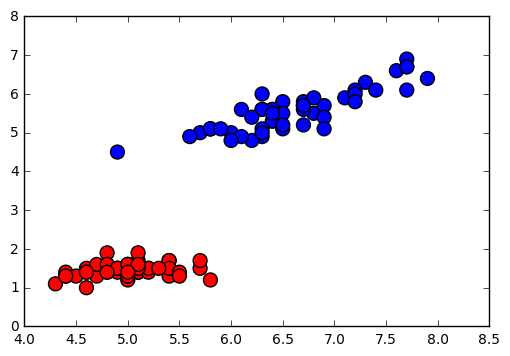

In [9]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=100)

In this case, we've defined two sets of features of interest for our data, along with two classes we'd like to predict. Because we are predicting a class that each datapoint belongs to, we call this problem a "classification" problem. Models that solve this problem are called "classifiers".

# Fitting / Validating the model
Now that we've got our features defined, we need a model that can distinguish the red from the blue class. `scikit-learn` has several such models. Here we'll use a support vector machine. Its task will be to find a line between the points shown above such that the distance from the line is far away from the center of each cluster of points.

Note that many models take a parameter when you instantiate them. This is often a free parameter that is model-specific. In the case of support vector machines, the parameter controls how strict the model is about finding allowing for incorrectly-labeled datapoints.

In [83]:
from sklearn.svm import SVC
svc = SVC(C=1., kernel='linear')

Models in `scikit-learn` all use the same basic API. They have a `fit` method, which takes as input either one or two arguments corresponding to the data that should be used to fit the model. Many of them also have a `predict` method that will output a model prediction for a new input point. If the model is a classifier, the prediction will be a label (generally an integer) that corresponds to a class.

As we mentioned before, it is important to **validate** the model as well. Good machine learning practice says that we *cannot* test the model on the same data that we used to fit it. So, we'll split up the data into a training and a testing set.

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=1337)

In [77]:
print(X_train.shape)
print(X_test.shape)

(60, 2)
(40, 2)


Now, we'll fit the model on our training data, and validate the model on the held out data.

In [78]:
# Training the model requires both input and output data
svc.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now we have a fit model, which can be used to make predictions about new data. We'll use the `predict` method to accomplish this.

In [79]:
predictions = svc.predict(X_test)
print(predictions)

[0 0 2 0 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 0 0 2 2 2 2 0 0 2 0 2 0 0 0 0 2 0 2
 2 2 0]


Note how the model predicted integers, corresponding to class 1 or 2. Let's plot the model predictions along with the two input feature values to see how they look:

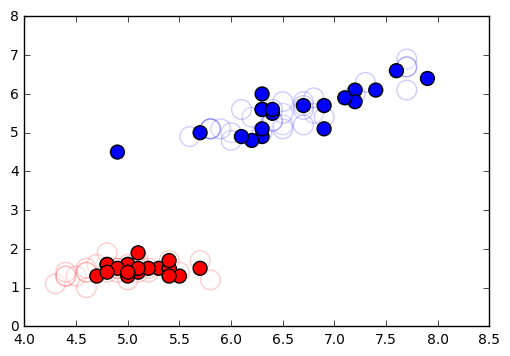

In [80]:
edgecolors = np.where(y_train == 0, cols_cmap[0], cols_cmap[1])

fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c='w', s=200,
           alpha=.2, edgecolors=edgecolors)
ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, s=100, cmap=cmap)


# Model inspection
As we can see, the model did a great job of separating these two classes. That's because they're easily separated by a single line drawn between the two groups. In machine learning terms, they are "linearly separable". Let's see what this line looks like:

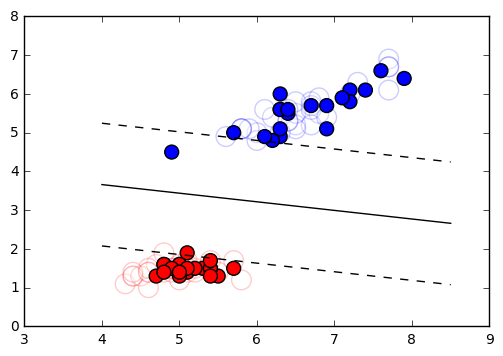

In [82]:
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c='w', s=200,
           alpha=.2, edgecolors=edgecolors)
ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, s=100, cmap=cmap)

plt_x = np.linspace(*ax.get_xlim(), num=100)

w = svc.coef_[0]
a = -w[0] / w[1]
line_y = a * plt_x - (svc.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = svc.support_vectors_[0]
yy_down = a * plt_x + (b[1] - a * b[0])

b = svc.support_vectors_[-1]
yy_up = a * plt_x + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
ax.plot(plt_x, line_y, 'k')
ax.plot(plt_x, yy_down, 'k--')
ax.plot(plt_x, yy_up, 'k--')

As you can see, the line perfectly splits the two groups. This is the structure that the model has learned in the data. If you give it a new datapoint, it will determine which side of the line that datapoint lies on, and will choose the class belonging to that side of the line.

What can we learn from this line? It's hard to determine, and highly question-specific. However, especially in the case of multiple input features, it may be possible to use the coefficients the model found in order to assume which features are "important" in distinguishing between classes.

# Extra: Comparing lots of classifiers
As we mentioned, there are a *lot* of classifiers in machine learning (and in scikit-learn). Below we'll plot the performance of a number of classifiers for several datasets.

For each dataset / classifier, we'll show the raw datapoints, and color each datapoint according to its class.

Then, we'll fit each classifier on the data and make predictions about the label for a range of values in the input space. This gives us an idea for which parts of the input space the classifier thinks "belong" to a given class. This is similar to plotting the line above, though it's a more empirically-driven way of visualizing the same idea.

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

We'll use a few functions scikit-learn uses for creating fake datasets. This will help visualize the behavior of each classifier for a different pattern of data.

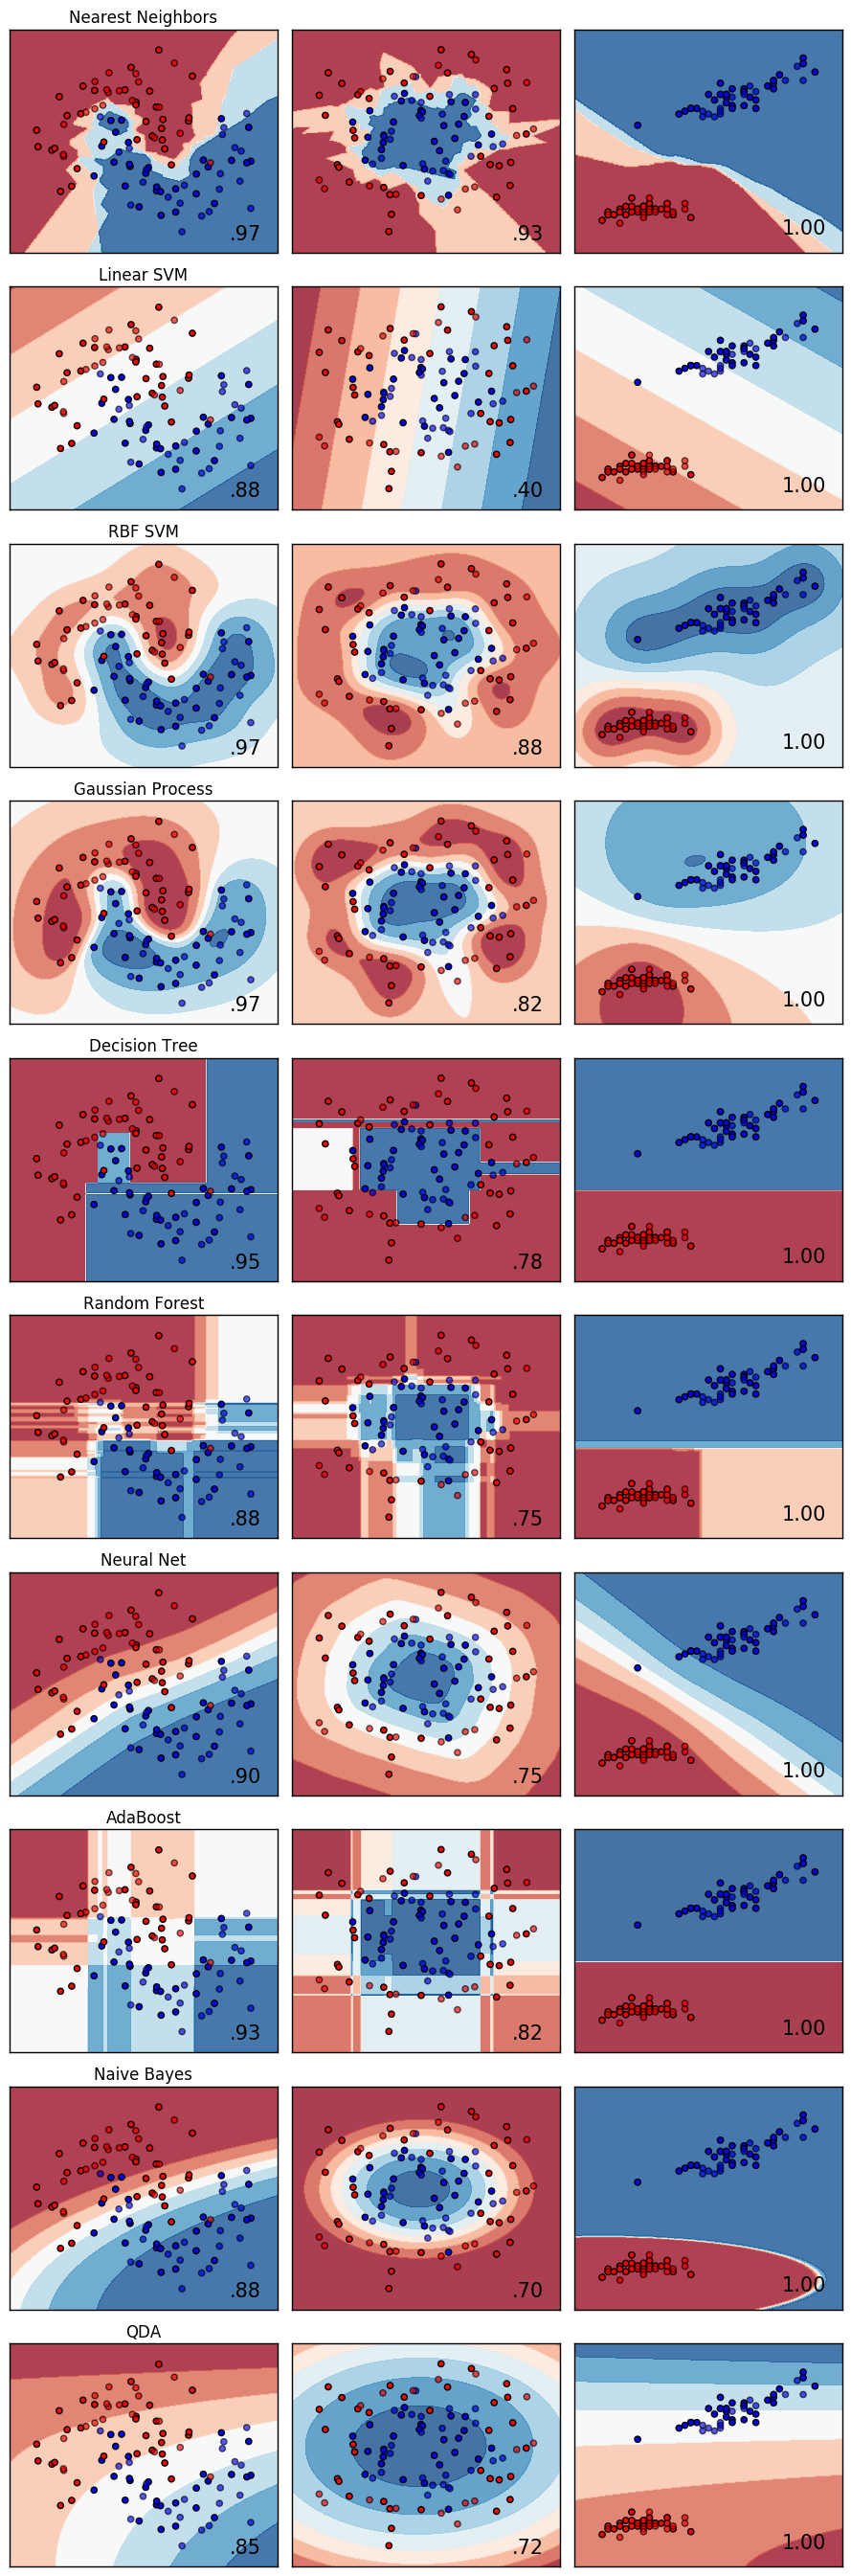

In [140]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

fig, axs = plt.subplots(len(classifiers), len(datasets), figsize=(9, 27))
# iterate over datasets
for ii, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    for ax in axs[:, ii]:
        if ii == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

    # iterate over classifiers
    for jj, (name, clf) in enumerate(zip(names, classifiers)):
        ax = axs[jj, ii]
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ii == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

plt.tight_layout()
plt.show()